<a href="https://colab.research.google.com/github/HalyshAnton/IT-Step-Pyton-AI/blob/main/module2/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Продаж велосипедів

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>


## Імпорт модулів

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Завантаження даних

In [39]:
sales = pd.read_csv(
    'https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/bike_sales.csv',
    index_col = "Unnamed: 0",
    parse_dates=['Date'])


## Знайомство з даними

In [5]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
sales.shape

(113036, 18)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

## Аналіз числових ознак

We'll analyze the `Unit_Cost` column:

### Основні статистичні характеристики

Середнє арифметичне(математисне сподівання) `mean`. Можна вважати типовим представником

In [13]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [ ]:
sales['Unit_Cost'].mean()

267.296365759581

Якщо дані мають аномально великі чи малі значення(викиди) то кращим типовим представником буде медіана `median`. Це число яке є більшим рівно за половину даних.

Стійкість характеристики до викидів називають робастністю (robust)

In [8]:
median_cost = sales['Unit_Cost'].median()
median_cost

9.0

In [12]:
# частка даних менших за медіану
(sales['Unit_Cost'] <= median_cost).mean()

0.5211260129516261

Також важливими є квантилі `quantile`: числа які більші рівно за певну частку даних. Найчастіше беруть 25% та 75%.

In [14]:
q_25 = sales['Unit_Cost'].quantile(q=0.25)
q_25

2.0

In [16]:
# частка даних менших за медіану
(sales['Unit_Cost'] <= q_25).mean()

0.317633320358116

Окрім типового представника, важливим є те наскільки дані "сконцентровані" навколо нього. Для цього є дві характеристики: дисперсія `var` та стандартне відхилення `std`

<img src="https://sp-ao.shortpixel.ai/client/to_auto,q_lossless,ret_img,w_1024/https://dataindependent.com/wp-content/uploads/2021/12/Screen-Shot-2020-09-04-at-7.46.16-AM-1024x599-1.png"
style="width:200px; float: right; margin: 0 20px 20px 20px;"></img>

In [17]:
sales['Unit_Cost'].var()

302319.05848407175

In [18]:
sales['Unit_Cost'].std()

549.8354831075126

In [19]:
print(f"корінь квадратний з дисперсії: {np.sqrt(sales['Unit_Cost'].var())}")
print(f"стандартне відхилення:         {sales['Unit_Cost'].std()}")

корінь квадратний з дисперсії: 549.8354831075126
стандартне відхилення:         549.8354831075126


Усі ці характеристики можна отримати за допомогою методу `describe`

In [20]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [21]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


### Основні графіки

Гістограма показує кількість точок що належить конкретному проміжку. Має вигляд стовпчиків.

Text(0.5, 0, 'dollars')

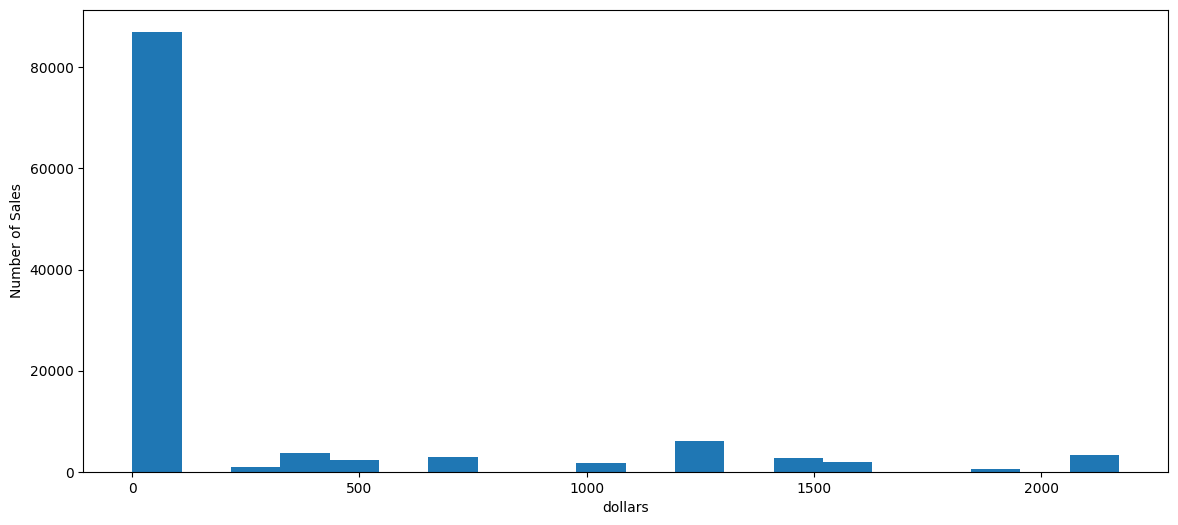

In [22]:
ax = sales['Unit_Cost'].plot(kind='hist',    # тип діаграми hist
                             bins=20,        # кількість стовпчиків
                             figsize=(14,6)  # розмір зображення(в дюймах)
                             )


ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

Вищенаведена гістограма є прикладом _поганих_ даних. Більшість алгоритмів ШІ вимагають щоб дані були _нормально розподілені_.

**Центральна гранична теорема:**
Сума деякої кількості незалежних і однаково розподілених випадкових величин із скінченною дисперсією буде прямувати до нормального розподілу із збільшенням кількості цих величин.

Через те, що на більшість числових величин впливає велика кількість _незалежних факторів_, умови теореми доволі часто виконуються.

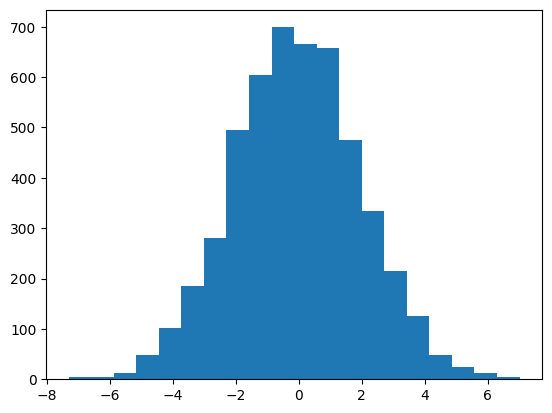

In [36]:
norm_data = np.random.normal(loc=0,      # середнє арифметичне
                             scale=2,   # стандартне відхилення
                             size=(5000,))

plt.hist(norm_data, bins=20)
plt.show()

Ящик з вусами `boxplot` показує взаємне розташування усіх квантилів(включно з медіаною), та дозволяє визначити викиди

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20201127012952/boxplot.png">

<Axes: >

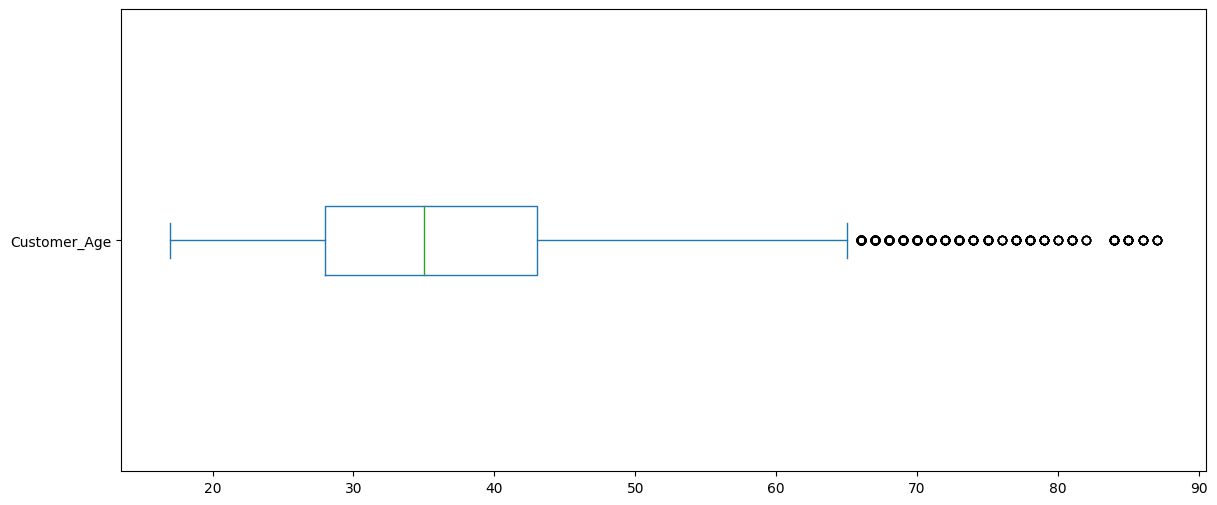

In [34]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: >

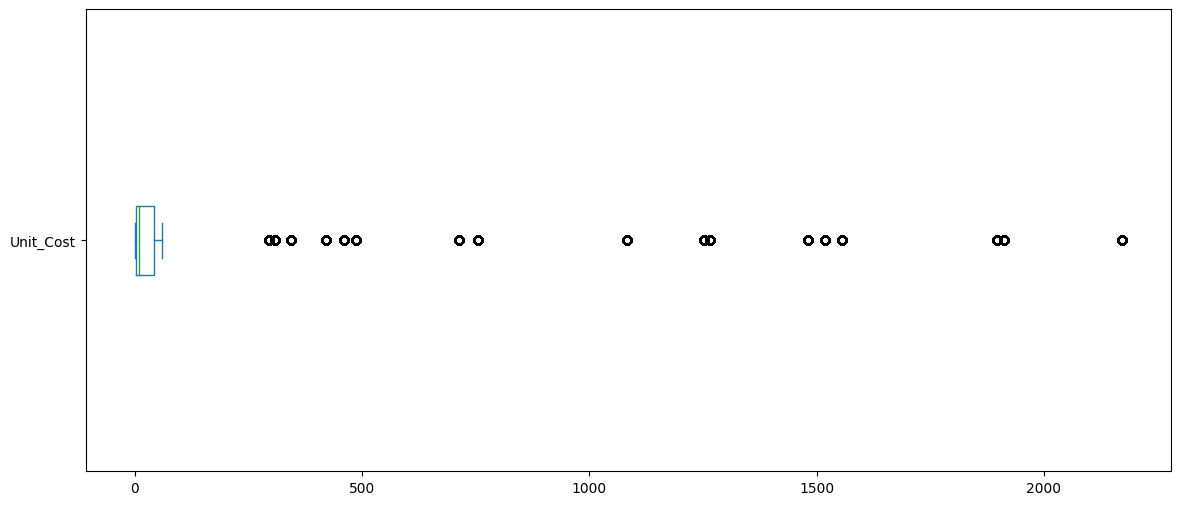

In [45]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

### Очищення від викидів

Існує бізліч алгоритмів для виявлення викидів(деякі з них вимагають умову нормальності даних), проте найбільш універсальним є квантильний аналіз:

1. Обчислюємо нижній `q1` та верхній `q3` квантилі
2. Обчислюємо медіану `median`
3. Очислюємо значення `IQR = q3 - q1`
4. Обчислюємо `lower = q1 - 1.5*IQR`
5. Обчислюємо `upper = q3 + 1.5*IQR`
6. Викидами вважаємо значення які `< lower` або `>upper`

Після очищення даних потрібно **обов'язково** перевірити їхню кількість

## Аналіз категоріальних ознак

We'll analyze the `Age_Group` column:

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

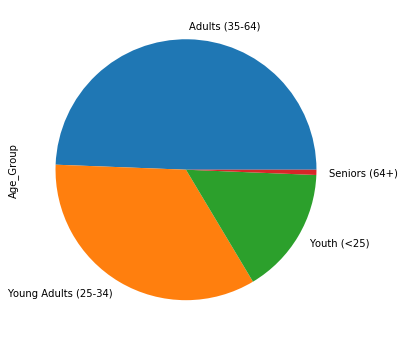

In [ ]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Sales')

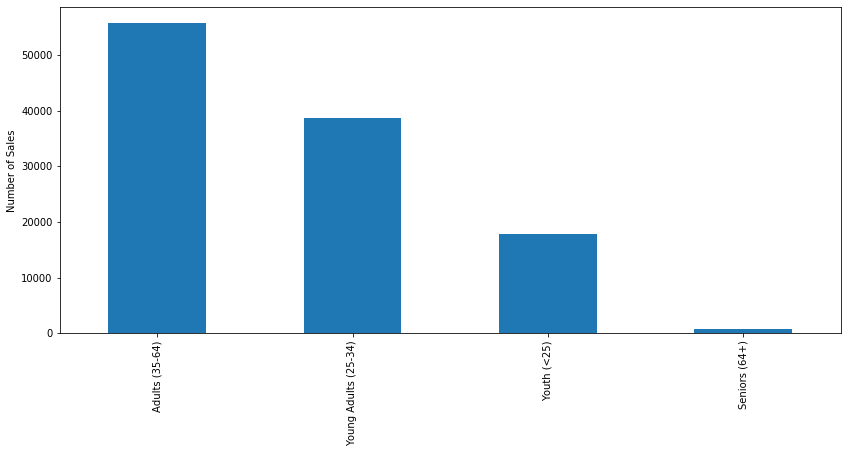

In [ ]:
ax = sales['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

In [48]:
sales.describe(include=["O"])

,Month,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product
count,113036,113036,113036,113036,113036,113036,113036,113036
unique,12,4,2,6,53,3,17,130
top,June,Adults (35-64),M,United States,California,Accessories,Tires and Tubes,Water Bottle - 30 oz.
freq,11234,55824,58312,39206,22450,70120,33870,10794




## Залежність між різними ознаками

Can we find any significant relationship?

### Кореляція
Коефіцієнт кореляції Пірсона вимірює лінійну залежність між двома наборами даних. Вимірюється в межех [-1, 1], де 1 - позитивна залежність, -1 - негативна, 0 - відсутність кореляції.

<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png">

In [51]:
corr = sales.corr(method='pearson')

corr

<ipython-input-51-6de0a335bf34>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales.corr(method='pearson')


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


**Візуалізація**

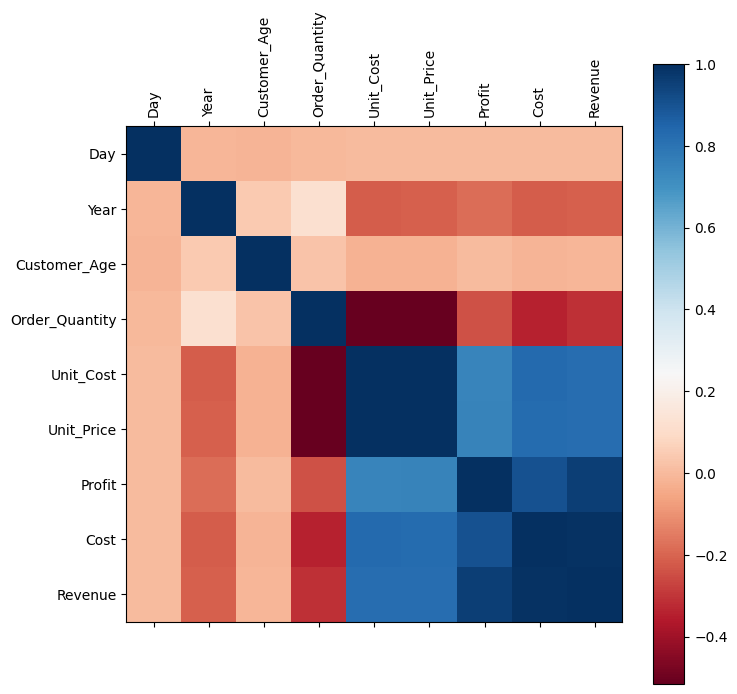

In [50]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()

Для виявлення будь-якої зростаючої або спадаючої залежності є коефіцієнт кореляції Спірмена

In [71]:
x = np.random.random(size=(100,))

df = pd.DataFrame({'x': x,
                   'x^4': x**4})

print(f"pearson  \n{df.corr(method='pearson')}")
print()
print(f"spearman \n{df.corr(method='spearman')}")

pearson  
            x       x^2
x    1.000000  0.870693
x^2  0.870693  1.000000

spearman 
       x  x^2
x    1.0  1.0
x^2  1.0  1.0


<ipython-input-53-5d0451e66a79>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales.corr(method='spearman')


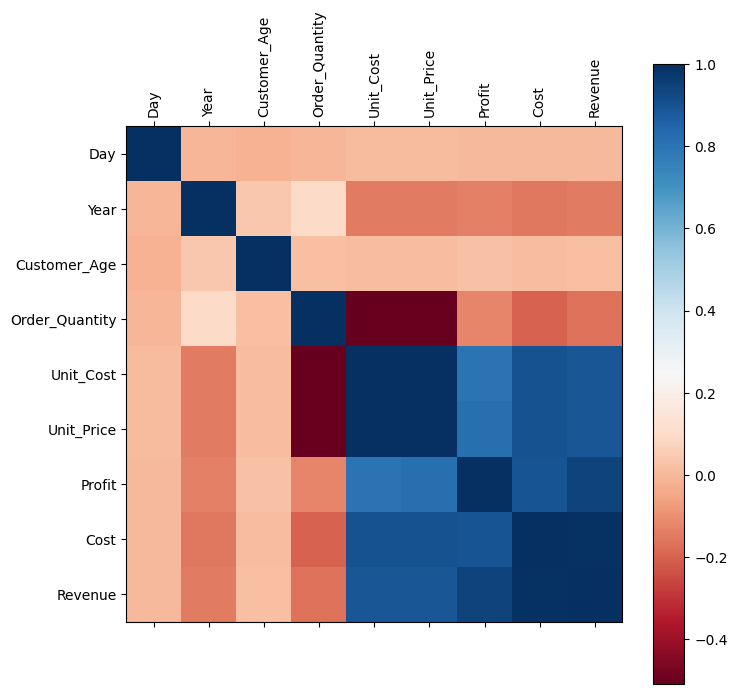

In [53]:
corr = sales.corr(method='spearman')

fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()

### Точкові діаграми
Зображення двох характеристик як координат точок

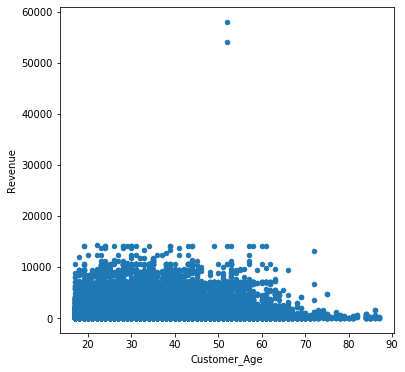

In [ ]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

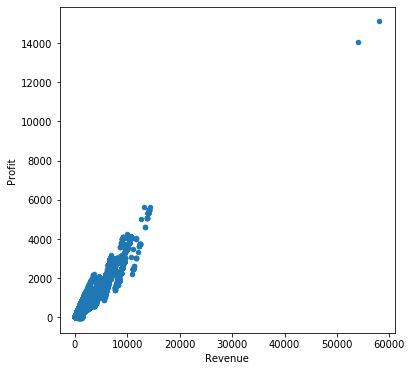

In [ ]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

### Групові ящики з вусами
Зображають декілька ящиків з вусами одної(числової) характеристики, згрупованих за значенням іншої(категоріальної) характеристики

Text(0, 0.5, 'Customer_Age')

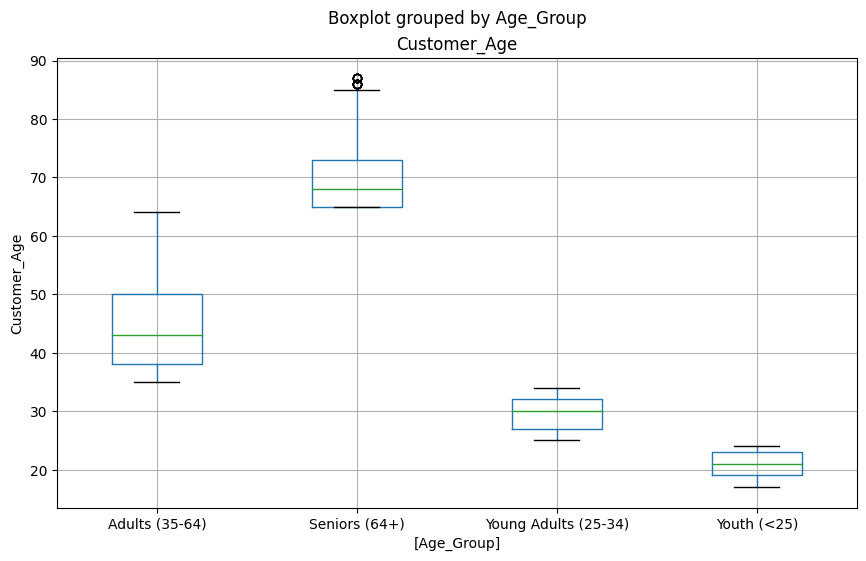

In [80]:
ax = sales[['Customer_Age', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Customer_Age')